In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
maze = np.array(
    [
        [0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0],
        [1, 1, 0, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 1, 0, 0, 0],
    ]
)

In [29]:
start = (0, 0)
goal = (4, 4)

In [30]:
actions = ["up", "down", "left", "right"]

In [31]:
rewards = np.full(maze.shape, -1)
rewards[goal] = 100

In [32]:
q_table = np.zeros((*maze.shape, len(actions)))

In [33]:
q_table.shape

(5, 5, 4)

In [34]:
alpha = 0.1
gamma = 0.9
epsilon = 0.1
episodes = 1000

In [35]:
def get_next_state(state, action):
    row, col = state
    if action == "up":
        row = max(row - 1, 0)
    elif action == "down":
        row = min(row + 1, maze.shape[0] - 1)
    elif action == "left":
        col = max(col - 1, 0)
    elif action == "right":
        col = min(col + 1, maze.shape[1] - 1)
    return (row, col)

In [36]:
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.choice(actions)
    else:
        return actions[np.argmax(q_table[state])]

In [37]:
for episode in range(episodes):
    state = start
    while state != goal:
        action = choose_action(state)
        next_state = get_next_state(state, action)
        reward = rewards[next_state]
        q_table[state][actions.index(action)] += alpha * (
            reward
            + gamma * np.max(q_table[next_state])
            - q_table[state][actions.index(action)]
        )
        state = next_state

In [38]:
# Evaluate the agent
state = start
path = [state]
while state != goal:
    action = actions[np.argmax(q_table[state])]
    state = get_next_state(state, action)
    path.append(state)

print("Path taken by the agent:")
print(path)

Path taken by the agent:
[(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]


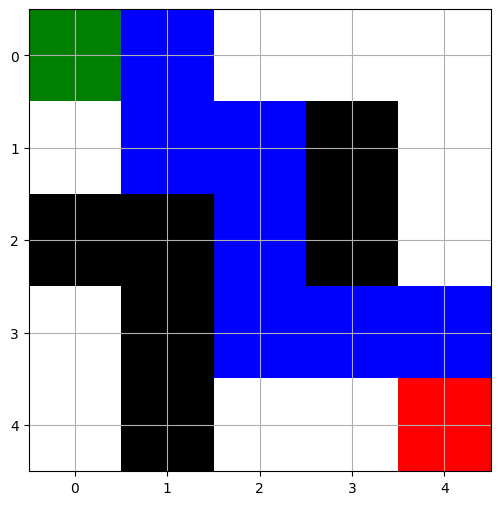

In [39]:
def plot_path(maze, path):
    maze_copy = maze.copy()
    for position in path:
        maze_copy[position] = 2  # Mark the path
    maze_copy[start] = 3  # Mark the start
    maze_copy[goal] = 4  # Mark the goal

    # Create a colormap
    cmap = plt.cm.colors.ListedColormap(["white", "black", "blue", "green", "red"])

    plt.figure(figsize=(6, 6))
    plt.imshow(maze_copy, cmap=cmap)
    plt.xticks(np.arange(maze.shape[1]))
    plt.yticks(np.arange(maze.shape[0]))
    plt.grid(True)
    plt.show()


plot_path(maze, path)